In [1]:
# Task 1,2
import pandas as pd
df = pd.read_csv("lab2_data.csv",sep=";",parse_dates=["data"],dayfirst=True)

In [4]:
df.dtypes

data    datetime64[ns]
USD            float64
CAD            float64
EUR            float64
dtype: object

In [5]:
df.head()

,data,USD,CAD,EUR
0,2024-10-15,96.1021,69.8366,105.4854
1,2024-10-12,96.0686,69.8478,105.1095
2,2024-10-11,97.2394,71.0295,106.5074
3,2024-10-10,96.9483,70.9880,106.4175
4,2024-10-09,96.1079,70.6208,105.6891


In [6]:
#!pip install statsmodels matplotlib scikit-learn

In [7]:
# Task 3
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=StandardScaler()

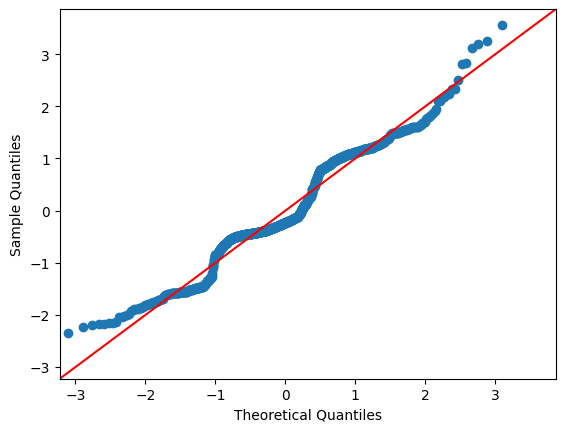

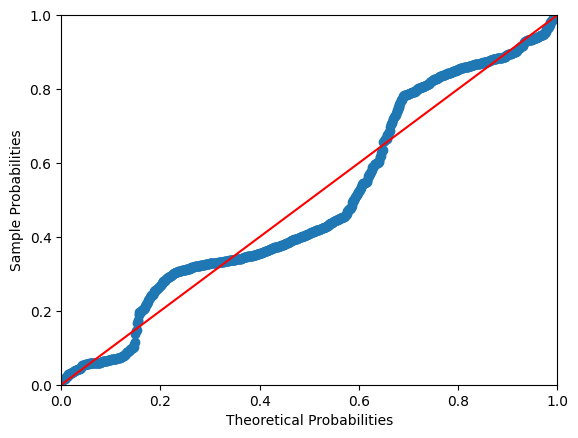

In [8]:

x = scaler.fit_transform(df[["USD"]])
df["USD"] = x[0:]
probplot_usd = sm.ProbPlot(df["USD"])
probplot_usd.qqplot(line="45")
probplot_usd.ppplot(line="45")
plt.show()



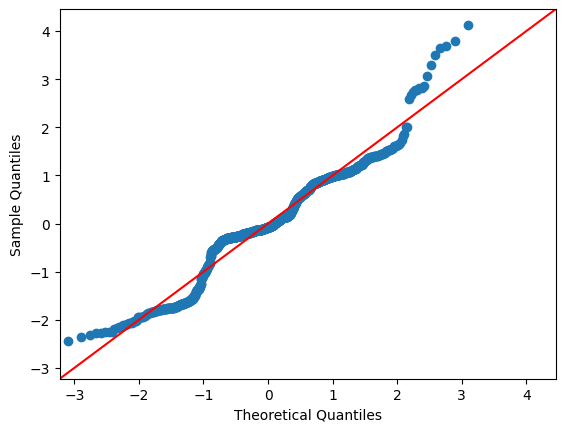

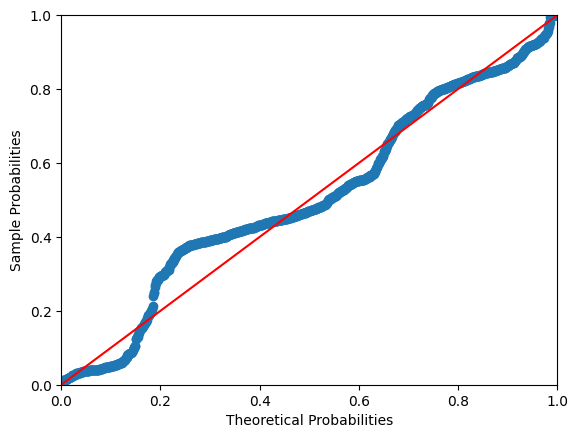

In [9]:
x = scaler.fit_transform(df[["CAD"]])
df["CAD"] = x[0:]
probplot_cad = sm.ProbPlot(df["CAD"])
probplot_cad.qqplot(line="45")
probplot_cad.ppplot(line="45")
plt.show()

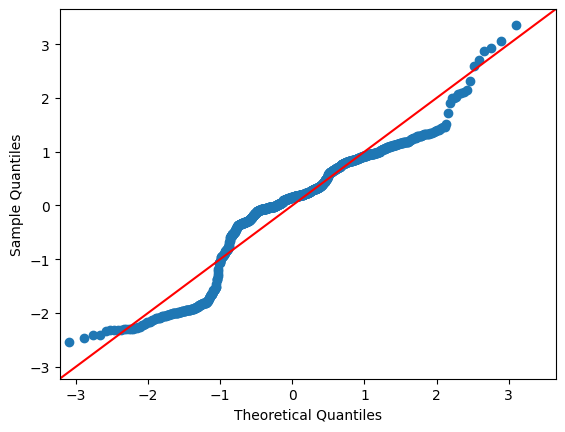

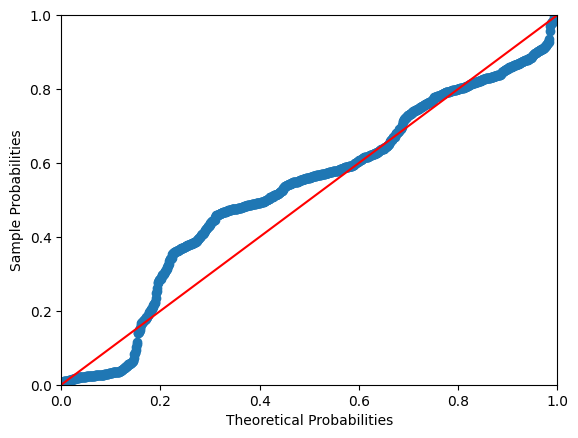

In [10]:
x = scaler.fit_transform(df[["EUR"]])
df["EUR"] = x[0:]
probplot_eur = sm.ProbPlot(df["EUR"])
probplot_eur.qqplot(line="45")
probplot_eur.ppplot(line="45")
plt.show()

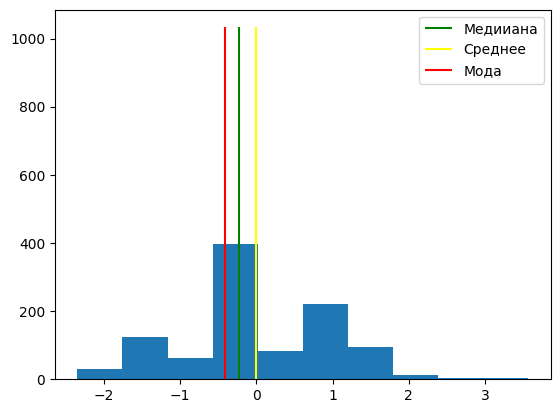

In [11]:
# TASK 4
plt.hist(df["USD"])
plt.vlines(df["USD"].median(),0,df["USD"].size,color="green",label="Медииана")
plt.vlines(df["USD"].mean(),0,df["USD"].size,color="yellow",label="Среднее")
plt.vlines(df["USD"].mode()[0],0,df["USD"].size,color="red",label="Мода")
plt.legend()

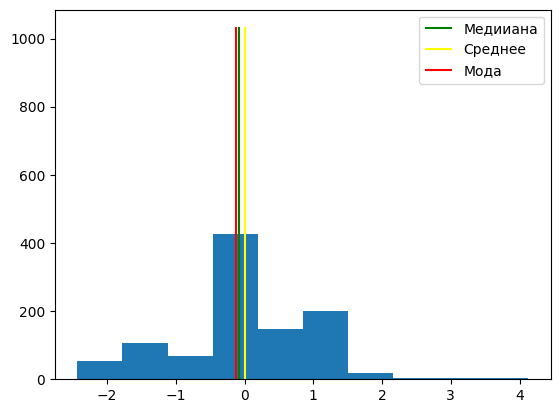

In [12]:
plt.hist(df["CAD"])
plt.vlines(df["CAD"].median(),0,df["CAD"].size,color="green",label="Медииана")
plt.vlines(df["CAD"].mean(),0,df["CAD"].size,color="yellow",label="Среднее")
plt.vlines(df["CAD"].mode()[0],0,df["CAD"].size,color="red",label="Мода")
plt.legend()

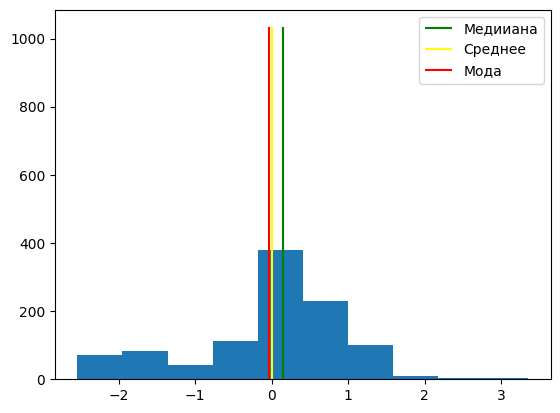

In [13]:
plt.hist(df["EUR"])
plt.vlines(df["EUR"].median(),0,df["EUR"].size,color="green",label="Медииана")
plt.vlines(df["EUR"].mean(),0,df["EUR"].size,color="yellow",label="Среднее")
plt.vlines(df["EUR"].mode()[0],0,df["EUR"].size,color="red",label="Мода")
plt.legend()

# Task 5

Выбор критерия нормальности делается в зависимости от выборки:
    7-2000 наблюдений – критерий Шапиро-Уилка 
    > 2000 наблюдений – подходят методы на основе эмпирической функции 
распределения (EDF):
- для большого числа отклонений в хвостах – критерий Андерсона-Дарлинга;
- для большого числа отклонений в середине – критерий Колмогорова-Смирнова

In [16]:
df["USD"].size

1033

In [53]:
# Применяем критерий Шапиро-Уилка
from scipy.stats import shapiro,norm
w_usd = shapiro(df["USD"])
w_cad = shapiro(df["CAD"])
w_eur = shapiro(df["EUR"])
print(f"USD : p-value= {w_usd[1]}")
print(f"CAD : p-value= {w_cad[1]}")
print(f"EUR : p-value= {w_eur[1]}")
# p-value мало везде, ни одно из распределений не является нормальным

USD : p-value= 2.850791451454492e-15
CAD : p-value= 1.8555600050920235e-16
EUR : p-value= 2.8416895312883873e-22


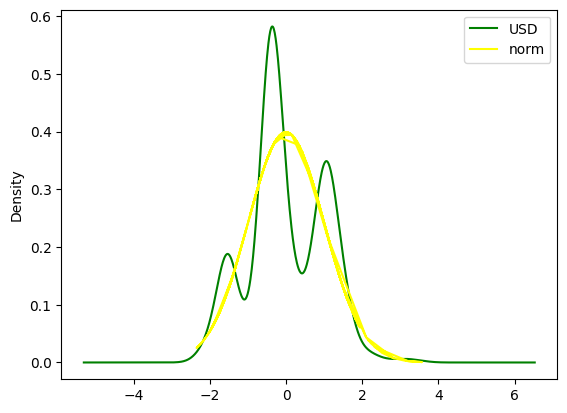

In [67]:
#df["CAD"].plot.kde(color="red",label="CAD")
df["USD"].plot.kde(color="green",label="USD")
#df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["USD"],norm.pdf(df["USD"],df["USD"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

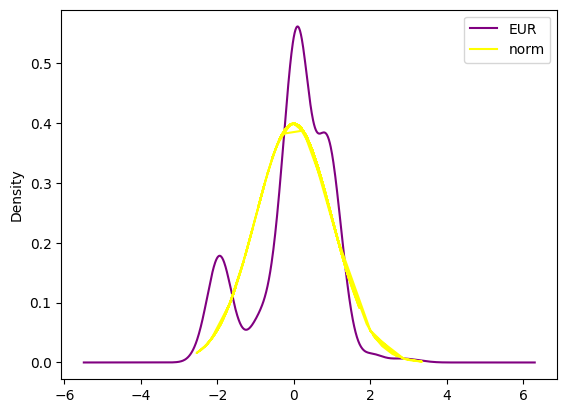

In [70]:
#df["CAD"].plot.kde(color="red",label="CAD")
#df["USD"].plot.kde(color="green",label="USD")
df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["EUR"],norm.pdf(df["EUR"],df["EUR"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

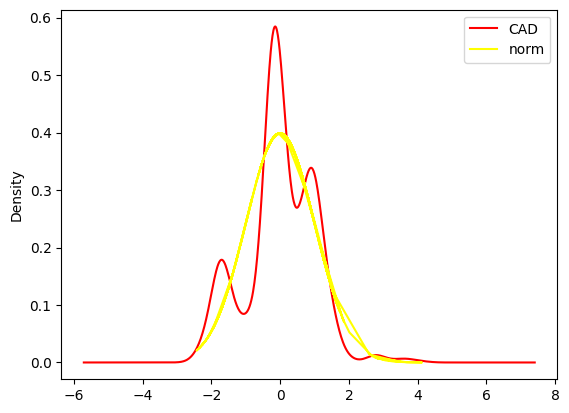

In [71]:
df["CAD"].plot.kde(color="red",label="CAD")
#df["USD"].plot.kde(color="green",label="USD")
#df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["CAD"],norm.pdf(df["CAD"],df["CAD"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

In [ ]:
# TASK 6